In [14]:
# e programa aki ta husa un  artificial recurrent neural network ku jama  Long Short Term Memory (LSTM) pa predict e closing stock price di un  corporation (tesla Inc.) husande e lastu  60 day stock price.

import pandas as pd
import math             
import numpy as np
import pandas_datareader as web 
from sklearn.preprocessing import MinMaxScaler  
from keras.models import Sequential         # mi mester a instala tensor flow paso e package no kier a traha 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')


In [29]:
# k pa importa e stock qoute 
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-1-14')

df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000
...,...,...,...,...,...,...
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500,98.428001
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000,96.267998
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500,95.629997


In [30]:
# number di rows ku coloms den e data set 
df.shape

(2021, 6)

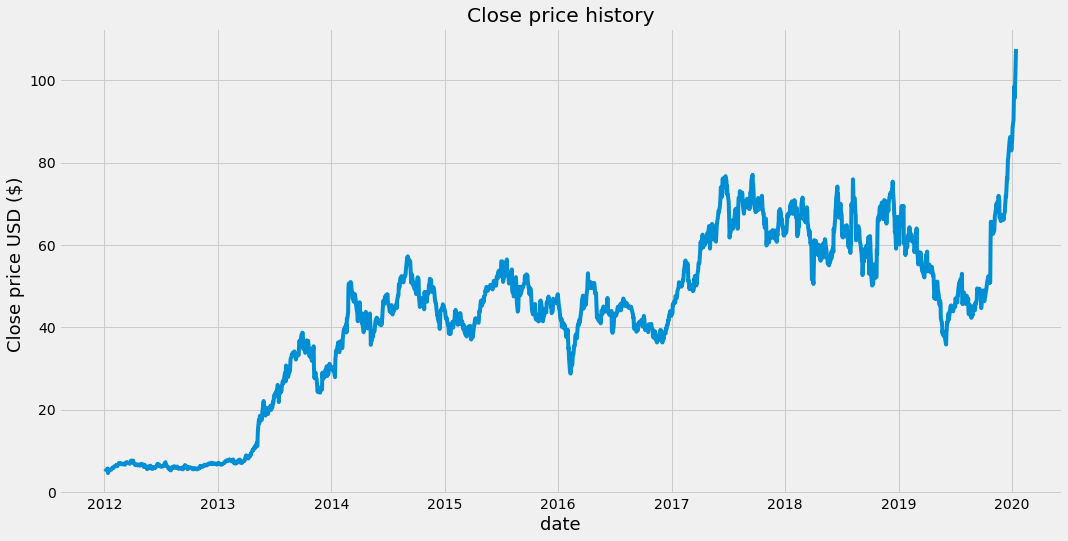

In [31]:
# visualisa si e prijs ke stock ta sera 

plt.figure (figsize=(16,8))
plt.title ('Close price history')
plt.plot (df['Close'])
plt.xlabel ('date', fontsize=18)
plt.ylabel ('Close price USD ($) ' , fontsize=18)
plt.show()


In [32]:
# tra un data frame nobo pa e close Colum so 
data = df.filter(['close'])

#kambia dat frame den numpy 
dataset = data.values

# get / compute e number di lina nan pa train  e model 
training_data_len = math.ceil( len(dataset) *.8 )

training_data_len

1617

In [33]:
    # scale e data v entre 0 i 1
    scaler = MinMaxScaler (feature_range=(0, 1)) 
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

   

ValueError: Found array with 0 feature(s) (shape=(2021, 0)) while a minimum of 1 is required by MinMaxScaler.

In [49]:
# training data set
#scale training dat aset
train_data = scaled_data[0:training_data_len , :]
# split data den x_train ku y_train data set 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print

NameError: name 'scaled_data' is not defined